# Práctica 3: limpieza de datos

## Dataframe 1: breast-cancer-wisconsin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None #silence

### Exploración de datos

In [27]:
df = pd.read_csv('C:/Users/HP/Downloads/cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [28]:
print(df.shape)
print(df.dtypes)

(569, 33)
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_

Selección de columnas numéricas

In [25]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['id' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean'
 'radius_se' 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se'
 'compactness_se' 'concavity_se' 'concave points_se' 'symmetry_se'
 'fractal_dimension_se' 'radius_worst' 'texture_worst' 'perimeter_worst'
 'area_worst' 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']


Selección de columnas no numéricas

In [26]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['diagnosis']


El dataset tiene 569 registros y 33 atributos, de los cuales 32 son numéricas y una es no numérica

### Datos Faltantes 

#### Técnica #1: mapa de calor de los datos faltantes 

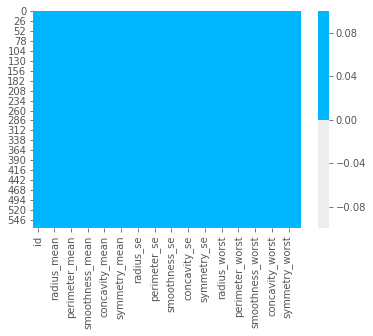

In [35]:
cols = df.columns[:32] 
colours = ['#EEEDED', '#00B6FF'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

No hay missings en el dataframe pues todo está de color azul, y no hay nada en amarillo

#### Técnica #2: Lista de porcentaje de datos faltantes¶ 

In [37]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    if (pct_missing > 0):
        #print(pct_missing)
        print('{} - {}%'.format(col, round(pct_missing*100)))

Unnamed: 32 - 100.0%


Marca Unmaned porque no hay missings

#### Técnica #3: Histograma de datos faltantes

In [42]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        

#ismissing_cols = [col for col in df.columns if 'ismissing' in col]
#df['num_missing'] = df[ismissing_cols].sum(axis=1)

#df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')

created missing indicator for: Unnamed: 32


No vale la pena mostrar un histograma porque hay variables con missings que graficar

### ¿Qué hacer? 

#### Técnica #1: Histograma y Box Plot

Histograma de radius_mean 

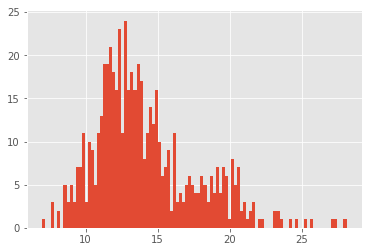

In [44]:
df['radius_mean'].hist(bins=100)

la distrución de radius:mean es bonita, pues no tiene missings

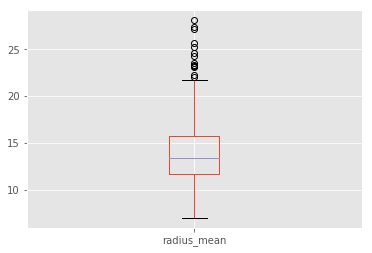

In [45]:
df.boxplot(column=['radius_mean'])

en el boxplot no se ven datos atípicos

#### Técnica #2: Estadística descriptiva

In [46]:
df['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

la estadística descriptiva también indica que la variable radius_mean están bien distribuidas

#### Técnica #3: Gráfico de barras

Esta técnica funciona para variables categóricas, por lo que usaremos la variable diagnosis

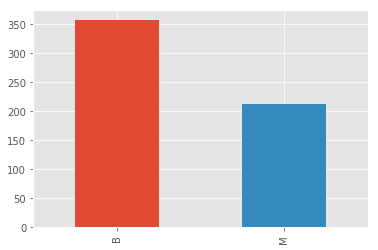

In [49]:
df['diagnosis'].value_counts().plot.bar()

### Datos innecesarios

¿Cómo descubrir datos innecesarios?

#### Tipo innecesario #1: Desinformativo / Repetitivo


Filas con con más del 95% de filas que tienen el mismo valor.

In [57]:
num_rows = len(df.index)
low_information_cols = [] 

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Unnamed: 32: 100.00000%
NaN    569
Name: Unnamed: 32, dtype: int64

Unnamed: 32_ismissing: 100.00000%
True    569
Name: Unnamed: 32_ismissing, dtype: int64

num_missing: 100.00000%
1    569
Name: num_missing, dtype: int64



No hay columnas repetitivas

#### Tipo innecesario #3: Duplicados

######                       Duplicados tipo #1: todas las características

In [59]:
df_dedupped = df.drop('id', axis=1).drop_duplicates()


print(df.shape)
print(df_dedupped.shape)

(569, 35)
(569, 34)


#### Duplicados tipo #2: características claves

Tomamos las primeras 5 características de los registros como clave

In [61]:
key = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']

df.fillna(-999).groupby(key)['id'].count().sort_values(ascending=False).head(20)

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean
28.11        18.47         188.50          2499.0     0.11420            1
12.21        18.02         78.31           458.4      0.09231            1
12.27        29.97         77.42           465.4      0.07699            1
             17.92         78.41           466.1      0.08685            1
12.25        22.44         78.18           466.5      0.08192            1
             17.94         78.27           460.3      0.08654            1
12.23        19.56         78.54           461.0      0.09586            1
12.22        20.04         79.47           453.1      0.10960            1
12.21        14.09         78.78           462.0      0.08108            1
12.30        19.02         77.88           464.4      0.08313            1
12.20        15.21         78.01           457.9      0.08673            1
12.19        13.29         79.08           455.8      0.10660            1
12.18        20.52         77.

In [62]:
df_dedupped2 = df.drop_duplicates(subset=key)

print(df.shape)
print(df_dedupped2.shape)

(569, 35)
(569, 35)


No hubo ninguna columna duplicada por características clave

### Datos inconsistentes

#### Tipo inconsistente #1: Capitalización

In [67]:
df['diagnosis'].value_counts(dropna=False)

B    357
M    212
Name: diagnosis, dtype: int64

En este caso no hay gran problema, pues en la única variable categorica de df solo hay dos valores M y B los cuales no tienen problemas de mayúsculas y minúsculas, pero en caso de haberlo haríamos lo siguiente:

In [71]:
df['diagnosis_upper'] = df['diagnosis'].str.upper()
df['diagnosis_upper'].value_counts(dropna=False)

B    357
M    212
Name: diagnosis_upper, dtype: int64

#### Tipo inconsistente #2: Formatos

En este caso no haremos el cambio de formatos porque no tenemos ninguna fecha en la BD

#### Tipo inconsistente #3: Valores categóricos

Distancia Edith ejemplo:

In [73]:
from nltk.metrics import edit_distance

df_city_ex = pd.DataFrame(data={'city': ['torontoo', 'toronto', 'tronto', 'vancouver', 'vancover', 'vancouvr', 'montreal', 'calgary']})


df_city_ex['city_distance_toronto'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'toronto'))
df_city_ex['city_distance_vancouver'] = df_city_ex['city'].map(lambda x: edit_distance(x, 'vancouver'))
df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,torontoo,1,8
1,toronto,0,8
2,tronto,1,8
3,vancouver,8,0
4,vancover,7,1
5,vancouvr,7,1
6,montreal,7,8
7,calgary,7,8


In [74]:
msk = df_city_ex['city_distance_toronto'] <= 2
df_city_ex.loc[msk, 'city'] = 'toronto'

msk = df_city_ex['city_distance_vancouver'] <= 2
df_city_ex.loc[msk, 'city'] = 'vancouver'

df_city_ex

,city,city_distance_toronto,city_distance_vancouver
0,toronto,1,8
1,toronto,0,8
2,toronto,1,8
3,vancouver,8,0
4,vancouver,7,1
5,vancouver,7,1
6,montreal,7,8
7,calgary,7,8


#### Tipo inconsistente #4: Direcciones

No hay direcciones ):